In [1]:
import sys, os
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from openslide import OpenSlide
from saturation_otsu import get_patch_mask, get_slice_idx

colors = []
for color_code in mcolors.TABLEAU_COLORS.values():
    colors.append(np.array([int(color_code[1:3], 16), int(color_code[3:5], 16), int(color_code[5:7], 16)]))

Text(0.5, 1.0, 'Mask')

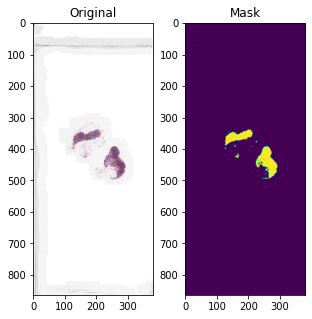

In [2]:
# 彩度に対してOTSU法を適用して, 抜き出されたpatchをいくつか描画し, マスクされた領域を描画
image_file = "normal_001.tif"
sample_ratio = 0.03
patch_size = 256

wsi = OpenSlide(image_file)
level = wsi.get_best_level_for_downsample(patch_size)
whole_image = wsi.read_region(location=(0,0), level=level, 
    size=wsi.level_dimensions[level])
mask = get_patch_mask(image_file=image_file, patch_size=patch_size)

fig, axs = plt.subplots(1,2,figsize=(5,5))
axs[0].imshow(whole_image)
axs[0].set_title("Original")
axs[1].imshow(mask)
axs[1].set_title("Mask")

n_slice: 2


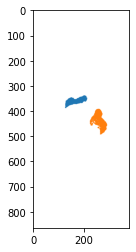

In [5]:
# いくつかの切片からなるWSI画像を, それぞれの切片に分ける。
slice_idx, n_slice = get_slice_idx(image_file=image_file, 
    patch_size=patch_size)
print(f"n_slice: {n_slice}")

slice_image = np.full((slice_idx.shape[0], slice_idx.shape[1], 3), fill_value=255)
for i_slice in range(n_slice):
    slice_image[slice_idx == i_slice] = colors[i_slice%len(colors)]

plt.imshow(slice_image)